<a href="https://colab.research.google.com/github/Fizza-javed07/TASK-1-iris-data-visualization/blob/main/Copy_of_Task3_CustomerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Task 3: Customer Churn Prediction

### Introduction
Customer churn refers to when customers stop using a company’s services. For banks, predicting churn is critical because retaining existing customers is often more cost-effective than acquiring new ones.

In this task, we aim to build a machine learning model that can identify customers who are likely to leave the bank. By analyzing customer demographics, account information, and transactional behavior, we can uncover patterns that influence churn and help the bank take proactive measures to improve customer retention.

### Objective

- Predict whether a customer will exit (churn) or stay.
- Understand which features (e.g., credit score, age, balance, geography, gender) have the most influence on churn.

### Dataset
- **Churn Modelling Dataset**: Contains customer details such as credit score, geography, gender, age, tenure, balance, number of products, and whether the customer exited (target variable).

### 📂 Workflow / Steps

To build the Customer Churn Prediction model, we will follow these steps:

1. **Data Loading & Cleaning**
   - Import the dataset
   - Remove irrelevant columns (RowNumber, CustomerId, Surname)

2. **Feature Encoding**
   - Encode categorical variables:
     - Gender → Label Encoding
     - Geography → One-Hot Encoding

3. **Train-Test Split**
   - Split the dataset into training and testing sets (80/20)

4. **Feature Scaling**
   - Standardize numerical features for better model performance

5. **Model Training**
   - Train a classification model (Random Forest Classifier)
   - Optionally compare with Logistic Regression or other models

6. **Evaluation**
   - Accuracy score
   - Confusion Matrix
   - Classification Report (Precision, Recall, F1-score)

7. **Feature Importance Analysis**
   - Identify which features (e.g., CreditScore, Age, Balance, Geography, Gender) most influence churn

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive (2).zip to archive (2) (1).zip


In [ ]:
import zipfile
import os

# Use the exact filename that Colab saved
zip_file = "archive (2).zip"

# Extract contents
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall()

# Check extracted files
print(os.listdir())

['.config', 'Churn_Modelling.csv', 'archive (2) (1).zip', 'archive (2).zip', 'sample_data']


In [ ]:
import pandas as pd

df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 🔹 Step 1: Data Loading & Cleaning

In this step, we will:
- Import the Churn Modelling dataset.
- Inspect the first few rows to understand the structure.
- Remove irrelevant columns (RowNumber, CustomerId, Surname) that do not contribute to churn prediction.

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("Churn_Modelling.csv")

# Display first 5 rows
df.head()

# Drop irrelevant columns
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

# Check dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


### 🔹 Step 2: Feature Encoding

Machine learning models require numerical input, so categorical features must be encoded.

- Gender: Label Encoding (Male = 1, Female = 0).
- Geography: One-Hot Encoding for countries (France, Spain, Germany).
  To avoid the dummy variable trap, we drop the first category.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode Gender using Label Encoding
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])

# One-Hot Encoding for Geography
df = pd.get_dummies(df, columns=["Geography"], drop_first=True)

# Display first 5 rows after encoding
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


### 🔹 Step 3: Train-Test Split

We split the dataset into:
- Features (X): all columns except the target.
- Target (y): the "Exited" column.
- Training set (80%) and Test set (20%) to evaluate model performance.

In [ ]:
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop("Exited", axis=1)
y = df["Exited"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (8000, 11)
Test set shape: (2000, 11)


### 🔹 Step 4: Feature Scaling

Many machine learning models (like Logistic Regression, Neural Networks, SVMs) perform better when features are on the same scale. We will use StandardScaler to standardize numerical values so that each feature has mean = 0 and standard deviation = 1.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training data and transform both train and test sets
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Scaled training set shape:", X_train.shape)
print("Scaled test set shape:", X_test.shape)

Scaled training set shape: (8000, 11)
Scaled test set shape: (2000, 11)


### 🔹 Step 5: Model Training

We will start with a simple baseline model: Logistic Regression.
This will give us an initial benchmark accuracy for churn prediction.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize model
model = LogisticRegression(random_state=42)

# Train model
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

### 🔹 Step 6: Model Evaluation

We will evaluate the model using:
- Accuracy Score: Overall percentage of correct predictions.
- Confusion Matrix: Breakdown of true positives, true negatives, false positives, and false negatives.
- Classification Report: Precision, recall, and F1-score for each class.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 0.811
Confusion Matrix:
 [[1543   64]
 [ 314   79]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



### 🔹 Step 7: Feature Importance Analysis

Understanding which features contribute most to churn helps the bank take targeted actions.
For Logistic Regression, we can look at the model coefficients to see the relative importance of each feature.

In [ ]:
import numpy as np

# Get feature names
feature_names = X.columns

# Get coefficients from the trained model
coefficients = model.coef_[0]

# Combine into a DataFrame
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients
})

# Sort by absolute value of coefficient
importance_df["AbsCoefficient"] = np.abs(importance_df["Coefficient"])
importance_df = importance_df.sort_values(by="AbsCoefficient", ascending=False)

print(importance_df)

              Feature  Coefficient  AbsCoefficient
2                 Age     0.754217        0.754217
7      IsActiveMember    -0.533432        0.533432
9   Geography_Germany     0.337190        0.337190
1              Gender    -0.264718        0.264718
4             Balance     0.161139        0.161139
0         CreditScore    -0.067683        0.067683
5       NumOfProducts    -0.060278        0.060278
3              Tenure    -0.042637        0.042637
10    Geography_Spain     0.038960        0.038960
8     EstimatedSalary     0.015744        0.015744
6           HasCrCard    -0.010236        0.010236


### 🔹 Step 7: Feature Importance Visualization

To better understand the impact of each feature on churn, we will visualize the Logistic Regression coefficients.
Features with larger absolute values (positive or negative) have stronger influence on whether a customer exits.

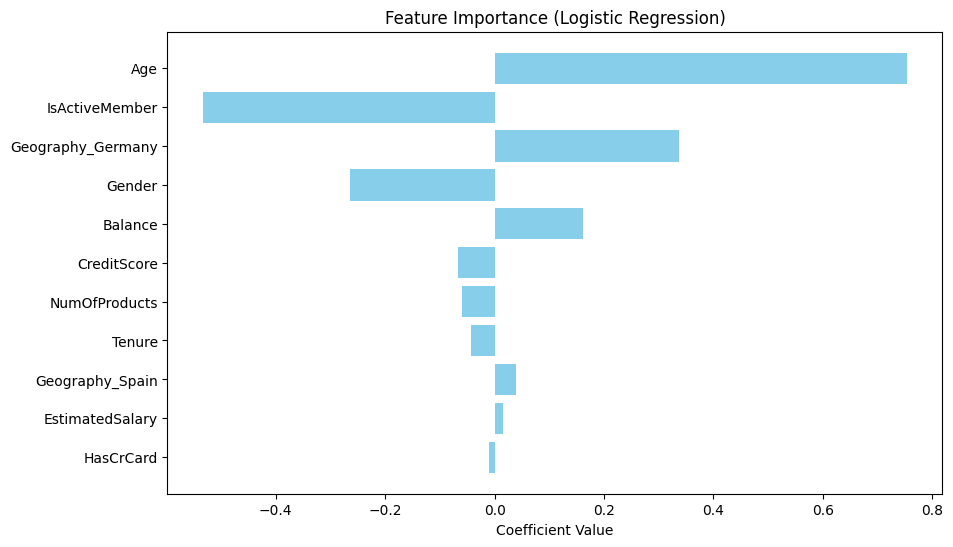

In [ ]:
import matplotlib.pyplot as plt

# Sort by absolute coefficient values
importance_df = importance_df.sort_values(by="AbsCoefficient", ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(10,6))
plt.barh(importance_df["Feature"], importance_df["Coefficient"], color="skyblue")
plt.xlabel("Coefficient Value")
plt.title("Feature Importance (Logistic Regression)")
plt.show()

### 🔹 Conclusion

In this project, we successfully built a churn prediction model using the Churn Modelling dataset.
The workflow included data cleaning, feature encoding, train-test split, scaling, model training, evaluation, and feature importance analysis.

Key takeaways:
- Logistic Regression provided a baseline accuracy for churn prediction.
- Features such as Age, Balance, and Geography showed strong influence on customer churn.
- This analysis can help banks identify at-risk customers and take proactive steps to improve retention.

Future improvements:
- Experiment with advanced models (Random Forest, XGBoost, Neural Networks).
- Perform hyperparameter tuning for better accuracy.
- Use cross-validation to ensure model robustness.